# 推论统计分析报告

## 假设验证的三种类型

* 汽车引擎排放标准---单样本检验分析
* 斯特鲁普效应---相关配对检验分析
* A/B测试---独立双样本检验

***

## 一. 汽车引擎排放标准---单样本检验分析

"超级引擎"是一家专门生产汽车引擎的公司，根据政府发布的新排放要求，引擎排放平均值要低于20ppm。

公司制造出10台引擎供测试使用，每一台的排放水平如下：

15.6 16.2 22.5 20.5 16.4 19.4 16.6 17.9 12.7 13.9

问题：怎么知道公司生产的引擎是否符合政府规定？

In [4]:
#导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#样本数据集
sample=pd.Series([15.6,16.2,22.5,20.5,16.4,19.4,16.6,17.9,12.7,13.9])

### 1.描述统计分析

In [8]:
#样本平均值
sample_mean=sample.mean()
#样本标准差
sample_std=sample.std()
print("样本平均值=",sample_mean,"单位：ppm")
print("样本标准差=",sample_std,"单位：ppm")

样本平均值= 17.169999999999998 单位：ppm
样本标准差= 2.9814426038413018 单位：ppm


pandas计算的标准差，默认除以的是n-1，也就是计算出的是样本标准差用来估计总体标准差的

### 2.推论统计分析

#### （1）假设检验-提出问题

零假设H0：公司生产的引擎不满足新规定，也就是平均值u>=20

备选假设H1：公司生产的引擎满足新规定，也就是平均值u<20

检验类型：只有1个样本，所以是单样本检验。

抽样分布类型：样本的数量为10，小于30，需要利用seaborn包来查看数据集的分布图来

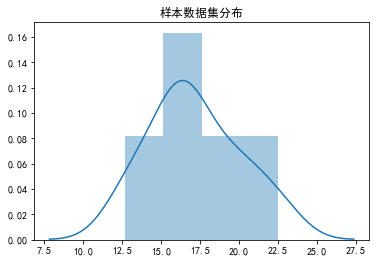

In [12]:
#导入数据包
import seaborn as sns
#解决画图中文乱码
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
#查看数据集分布
sns.distplot(sample)
plt.title('样本数据集分布')
plt.show()

确定分布类型，从上图可以看出数据集的分布近似于正态分布，因此符合t分布。

检验方向：由于备选假设中包含小于号，所以我们使用单尾检验中的左尾检验。

#### （2）假设检验-找到证据

即在零假设成立前提下，得到样本平均值的概率p值

In [16]:
#用python统计包scipy自动计算
from scipy  import stats
pop_mean=20  #总体平均值：政府发布的标准排量20
t,p_twoTail=stats.ttest_1samp(sample,pop_mean)  # ttest_1samp 单独样本下的t检验,注意是1samp
print('t值=',t,"双尾检验的p值",p_twoTail)

t值= -3.00164952589 双尾检验的p值 0.0149164142489


In [17]:
'''
根据对称性，单尾p值是双尾的1半
'''
p_oneTail=p_twoTail/2 
print("单尾检验的p值=",p_oneTail)

单尾检验的p值= 0.00745820712445


#### （3）假设检验-判断标准

In [18]:
#判断标准：显著水平选取 alpha=5%
alpha=0.05

#### （4）假设检验-做出结论

In [19]:
'''
左尾的判断条件：t<0 and p<alpha
右尾的判断条件：t>0 and p<alpha
'''
#得出结论
if(t<0 and p_oneTail<alpha):
    print('拒绝零假设，统计显著，即汽车引擎排放满足标准')
else:
    print("接受零假设，无统计显著，即汽车引擎排放不满足标准")

拒绝零假设，统计显著，即汽车引擎排放满足标准


#### （5）置信区间

方法一：人工查t分布表求t,然后逐步求置信区间

方法二：用excel的TINV（显著水平=1-置信水平，自由度）求t，然后逐步求置信区间

方法三：用python的scipy.stats的t,interval模块直接求置信区间

In [38]:
t_ci=2.262157
se=stats.sem(sample)
print(se)

0.94281493412


In [39]:
a=sample_mean - t_ci * se
b=sample_mean + t_ci * se
print('CI=[%f,%f]'%(a,b))

CI=[15.037205,19.302795]


In [40]:
stats.t.interval(0.95,df=9,loc=sample_mean,scale=se) #和案例不同

(15.037204443640904, 19.302795556359094)

#### （6）效应量

In [42]:
#差异指标Cohen's d
d=(sample_mean- pop_mean)/sample_std
#相关度指标R2
n=10
df=n-1
R2=(t*t)/(t*t+df)
print('d=',d,'R2=',R2)

d= -0.9492049239364257 R2= 0.500274845399


#### （7）推论统计分析报告

描述统计分析
样本平均值17.17ppm，样本标准差2.98ppm

推论统计分析

* 假设检验
独立样本t(9)=-2.262157,p=0.0075(α=5%)，单尾检验（左尾）
公司引擎排放满足标准

* 置信区间
单个平均值的置信区间，95% CI=(15.04,19.30）

* 效应量
R2=.50
d=-0.95，效果显著

***

## 二. 斯特鲁普效应---相关配对检验分析

斯特鲁普效应：心理学中指优势反应（回答字的意思）对非优势反应（回答字的颜色）的干扰。简单来说，斯特鲁普效应是当有与原有认知不同的情况出现时，人们的反应时间会较长。

接下来我们要验证斯特普鲁效应。

通过网上的stroop实验来测试人的反应时间，每名参与者得到两组有颜色的文字，第一组数据是字体内容和字体颜色一致，第二组数据是字体内容和字体颜色不一致。每名参与者对每组文字说出文字的颜色，并分别统计每名参与制完成每组的时间。

In [35]:
#导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#导入样本数据集
f=open('C:/Users/chen jia ni/Desktop/斯特鲁普数据集.csv')#读取的路径含中文的处理方法
sample = pd.read_csv(f)
sample.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


### 1.描述统计分析

In [36]:
#查看样本描述统计信息
sample.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,13.926875,22.350750
std,3.540219,5.010218
min,8.630000,15.687000
25%,11.895250,18.716750
50%,13.627500,21.046000
75%,15.671250,24.536000
max,22.328000,35.255000


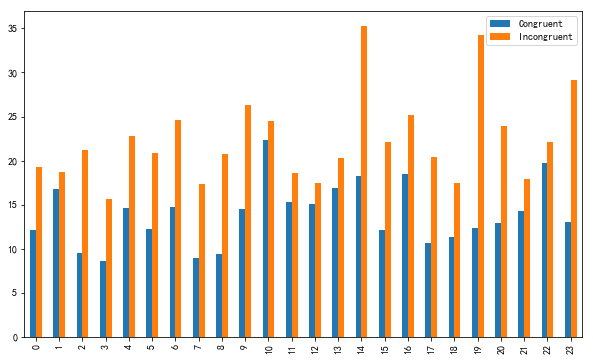

In [38]:
#信息一致的情况与信息不一致的情况下的反应时间对比图
fg=plt.figure(figsize=(10,6))
ax1=fg.add_subplot(1,1,1)
sample.plot(kind='bar',ax=ax1)
plt.show()

根据所绘图可以看出：“不一致(Incongruent)”的情况下所用时间均大于“一致(Congruent)”情况，也就是当字体内容和字体颜色不一致时，实验者的平均反应时间会变长。
据此，我们对斯特鲁普效应进行假设检验。

### 2.推论统计分析

#### （1）假设检验-提出问题

第一组“一致”的反应时间的均值为u1，第二组“不一致”反应时间的均值为u2.

零假设H0：斯特鲁普效应不存在，即u1=u2

备选假设H1：斯特鲁普效应存在，即u1<u2

检验类型：因为使用的两组数据是相关样本，所以是**相关配对检验**

抽样分布类型：样本的数量为24，小于30，相关配对检验只关注每对相关的**差值**，

所以我们用seaborn包来查看**差值数据集的分布图**来确定分布类型

In [39]:
#增加差值列
sample['差值']=sample['Congruent']-sample['Incongruent']
sample.head()

,Congruent,Incongruent,差值
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


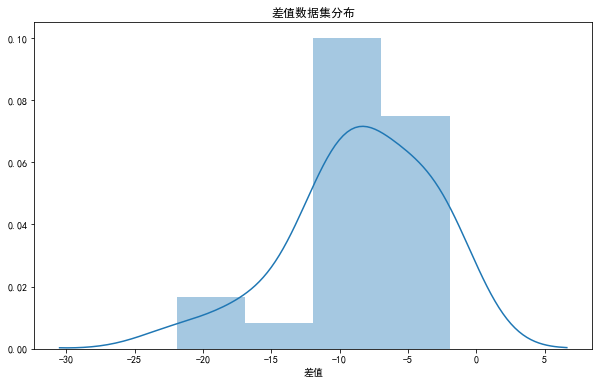

In [40]:
#解决画图中文乱码
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
#导入seaborn包，用distplot包做图
import seaborn as sns
fg=plt.figure(figsize=(10,6))
ax1=fg.add_subplot(1,1,1)
sns.distplot(sample['差值'])
plt.title('差值数据集分布')
plt.show()

从图中可以看出数据集的分布近似于正态分布，因此符合t分布

检验方向：由于备选假设中包含小于号，所以使用左尾检验。

#### （2）假设检验-找到证据

在零假设成立的前提下，需要得到样本平均值的概率p值

In [41]:
from scipy import stats
t,p_twoTail=stats.ttest_rel(sample['Congruent'],sample['Incongruent'])#ttest_rel相关配对检验
print('t值=',t,'双尾检验的p值=',p_twoTail)

t值= -8.08861087281 双尾检验的p值= 3.54871914972e-08


In [42]:
p_oneTail=p_twoTail/2
print('单尾检验的p值=',p_oneTail)

单尾检验的p值= 1.77435957486e-08


#### （3）假设检验-判断标准

** 显著水平alpha=0.05 **

#### （4）假设检验-做出结论

In [44]:
'''
左尾判断条件：t<0,and p/2<alpha
右尾判断条件：t>0,and p/2<alpha
'''
alpha=0.05
if(t<0 and p_oneTail<alpha):
    print("拒绝零假设，有统计显著，即接受备选假设，斯特鲁普效应存在。")
else:
    print("接受零假设，即斯特鲁普效应不存在")

拒绝零假设，有统计显著，即接受备选假设，斯特鲁普效应存在。


#### （5）置信区间

置信水平=0.95，自由度=24-1=23

In [ ]:
用excel的TINV（显著水平，自由度）求得t值为 2.068658

In [46]:
#差值平均值,标准误差
sample_mean=sample['差值'].mean()
se=stats.sem(sample['差值'])
print(sample_mean,se)

-8.423875 1.04144891286


**方法一：**

In [50]:
CI=stats.t.interval(0.95,df=23,loc=sample_mean,scale=se)
print("置信区间：",CI)

置信区间： (-10.578276219442028, -6.2694737805579743)


**方法二：经查得t=2.068658 **

In [52]:
t=2.068658
a=sample_mean - t * se
b=sample_mean + t * se
print('两个平均值差值的置信区间，95置信水平 CI=[%f,%f]'%(a,b))

两个平均值差值的置信区间，95置信水平 CI=[-10.578277,-6.269473]


#### （6）效应量

In [53]:
#总体均值为0 ：为什么总体均值为0？
pop_mean=0
sample_std=sample['差值'].std()
d=(sample_mean-pop_mean)/sample_std
print('d=',d)

d= -1.6510807805255563


#### （7）分析报告

**描述统计分析**

* 字体内容和字体颜色一致情况下，平均反应时间是 13.93 秒,标准差是 3.54 秒

* 字体内容和字体颜色不一致情况下，平均反应时间是 22.35 秒,标准差是 5.01 秒

* “不一致”情况下所用时间均大于“一致”情况，也就是当字体内容和字体颜色不一致时，实验者的反应时间变长

**推论统计分析**

* 假设检验
相关配对检验t(23)=-8.09, p=1.77e-08 (α=5%), 单尾检验（左尾）
统计显著，拒绝零假设，从而验证了斯特鲁普效应。

* 置信区间
两个平均值差值的置信区间，95%置信水平 CI=[-10.58,-6.27]

* 效应量
d= - 1.65

***

## 三. A/B测试---独立双样本检验

**A/B 测试：**简单来说，就是为同一个目标制定两个方案（比如两个手机键盘界面），

让一部分用户使用 A 方案，另一部分用户使用 B 方案，记录下用户的使用情况，看哪

个方案更符合设计。可以看出AB测试对于产品优化有很大的帮助。


**案例介绍：**有两款键盘布局不一样的手机(A版本，B版本)，你作为公司的产品经理，

想在正式发布产品之前知道，哪个键盘布局对用户体验更好呢？

我们将衡量标准定为用户打字时拼错字产生的影响，如果一个键盘布局对用户打字时拼

错产生的影响较小，那么这个布局是符合用户体验习惯的。

**采集数据：**我们随机抽取实验者，将实验者分成2组，每组25人，A组使用键盘布局

A，B组使用键盘布局B。让他们在30秒内打出标准的20个单词文字消息，然后记录每组打错字的数量。

In [21]:
#导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#解决画图中文乱码
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [22]:
#导入样本数据集
f=open('C:/Users/chen jia ni/Desktop/键盘AB测试.csv',encoding="UTF-8")
sample=pd.read_csv(f)
sample.info

<bound method DataFrame.info of      A   B
0    6   6
1    6  11
2    2   8
3    7   5
4    8  11
5    8   8
6    2  10
7    3   7
8    5   4
9    7   3
10  10   7
11   5   6
12   4  10
13   7  10
14   5   6
15   7   5
16   4  10
17   5  11
18   2  13
19   5   8
20   3   5
21   4  11
22   4   7
23   4   8
24   4   5>

### 1.描述统计分析

In [23]:
#查看描述统计信息
sample.describe()

,A,B
count,25.000000,25.000000
mean,5.080000,7.800000
std,2.059935,2.645751
min,2.000000,3.000000
25%,4.000000,6.000000
50%,5.000000,8.000000
75%,7.000000,10.000000
max,10.000000,13.000000


由表可得：A版本的平均打错字数为 5.08，低于B版本的平均打错字数为 7.80

### 2.推论统计分析

#### （1）假设检验-提出问题

零假设H0：A版本和B版本没有差别，也就是A版本平均值=B版本平均值。

备选假设H1：A版本和B版本有差别，也就是A版本平均值 不等于 B版本平均值。

检验类型：因为这里是两组不同的人来测试2组独立版本，所以是双独立样本检验。

抽样分布类型：样本的数量为25，小于30，需要利用seaborn包来查看数据集的分布

图来确定分布类型。

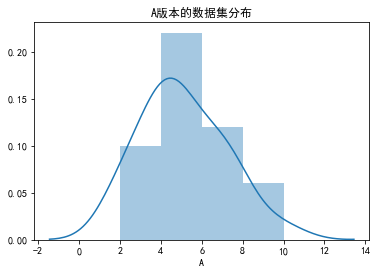

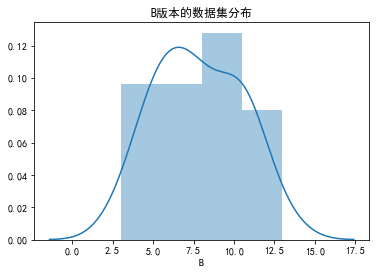

In [24]:
#导入seaborn
import seaborn as sns
sns.distplot(sample['A'])
plt.title('A版本的数据集分布')
plt.show()
sns.distplot(sample['B'])
plt.title('B版本的数据集分布')
plt.show()

从上图可以看出AB版数据集分布都近似于正态分布，故符合t分布。

检验方向：由于备选假设中包含不等号，所以我们使用**双尾检验**。

#### （2）假设检验-找到证据

在零假设成立的条件下，需要得到样本平均值的概率p值

In [25]:
#Scipy包的双独立样本t检验不能返回自由度，对于后面计算置信区间不方便。
#选择使用另一个统计包：statsmodels
import statsmodels.stats.weightstats as st
#ttest_ind：独立双样本t检验
'''
usevar='unequal'两个总体方差不一样 ??参数含义
返回的第一个值t是假设检验计算出的（t值），
第二个p_two是双尾检验的p值
第三个df是独立双样本的自由度
'''
t,p_two,df=st.ttest_ind(sample['A'],sample['B'],usevar='unequal')
print('t=',t,'，p_two=',p_two,'，df=',df)

t= -4.05593853686 ，p_two= 0.000194574553072 ，df= 45.2781333114


#### （3）假设检验-判断标准

判断标准，显著水平=0.05

In [26]:
alpha=0.05

#### （4）假设检验-做出结论

In [27]:
#双尾判断条件：p<显著水平/2时，拒绝零假设，即有显著差异。
if(p_two<alpha/2):
    print('拒绝零假设，有统计显著，即接受备选假设，即A版本和B版本有差异')
else:
    print("接受零假设，没有统计显著，即A版本和B版本没有差异")

拒绝零假设，有统计显著，即接受备选假设，即A版本和B版本有差异


#### （5）置信区间

**双独立样本检验置信区间的样本平均值=A版本平均值-B版本平均值**

In [34]:
a_n=25
b_n=25
a_mean= 5.08
b_mean= 7.80
sample_mean=a_mean-b_mean
se=np.sqrt( np.square(a_std)/a_n + np.square(b_std)/b_n )
print(sample_mean,se)

-2.7199999999999998 0.670621519435


In [35]:
# 方法一：直接求出置信区间
CI=stats.t.interval(0.95,df=24,loc=sample_mean,scale=se)
print("置信区间：",CI)

置信区间： (-4.1040947893582818, -1.3359052106417182)


In [36]:
#方法二：自有度=25-1=24，先用excel求t=2.063899
t=-4.05593853686
a_n=25
b_n=25
a_std=2.059935
b_std=2.645751
a=sample_mean-t2*se
b=sample_mean+t2*se
print('置信水平0.95的置信区间 CI=[%f,%f]'%(a,b))

置信水平0.95的置信区间 CI=[-4.104095,-1.335905]


#### （6）效应量

**这里的标准差，因为是双独立样本，需要合并标准差（pooled standard deviations）代替**

In [37]:
#合并标准差
a_mean=5.08
b_mean=7.80
sp=np.sqrt(((a_n-1)*np.square(a_std)+(b_n-1)*np.square(b_std))/(a_n+b_n-2))
d=(a_mean-b_mean)/sp
print('d=',d)

d= -1.14719279897


#### （7）统计分析报告

描述统计分析

* A版本打错字数量的平均值是 5.08个，标准差是 2.06个

* B版本打错字数量的平均值是 7.80个，标准差是 2.65个

推论统计分析

* 独立双样本检验t=-4.06,p=0.00019(alpha=0.05),双尾检验

  统计上存在显著差异，拒绝零假设，即A版本和B版本有差异

* 置信区间 CI=[-4.10,-1.34]

* 效应量=-1.15。